In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We note that there are some rows with no years or with no publishers. We will drop these rows for this analysis, as this workbook depends a lot of visualizing the data by Year and by Publishers

In [6]:
# Convert Year from Float to Int
df.dropna(how = 'any', inplace = True)
df.shape
# No. of rows dropped = 16598 - 16291 = 307

(16291, 11)

In [7]:
# Convert Year to Int
df['Year'] = df['Year'].astype(int)

### Years in which Games are released
First, we get the count of number of games released for each year in the dataset. 

We first get the data for the top 10 years. We observe that the highest number of games (according to this dataset) released is from 2007 to 2011. 

In [8]:
df.groupby('Year')['Name'].count().sort_values(ascending = False).head(10)

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Name, dtype: int64

Bottom 10 years. We note that 2020 and 2017 are in the lowest, and this is likely due to incomplete data since this dataset is updated in 2017. Hence, we will remove data from 2017 and 2020, as they are unlikely to produce any valuable insights into the gaming industry for the years 2017 and 2020.

In [9]:
df.groupby('Year')['Name'].count().sort_values().head(10)

Year
2020     1
2017     3
1980     9
1984    14
1985    14
1988    15
1987    16
1990    16
1983    17
1989    17
Name: Name, dtype: int64

In [10]:
# Remove Rows for year 2017 and 2020, as these games are too new to have any useful findings
df = df[~df['Year'].isin([2017, 2020])]

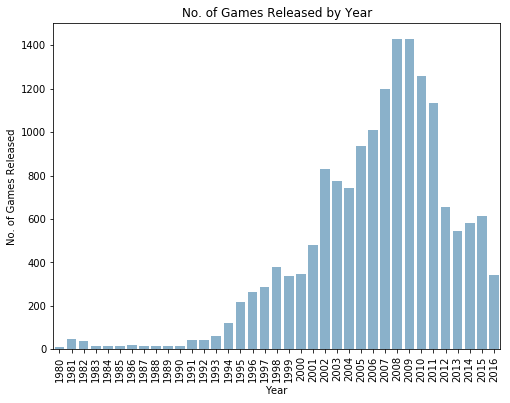

In [11]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(df['Year'], color = '#7FB3D5')
plt.title('No. of Games Released by Year')
plt.xticks(rotation = 90)
plt.ylabel('No. of Games Released')
plt.show()

We observe that global sales of video games started picking up rapidly from 1996 onwards, and global sales of games incresed until its peak in 2009 to 2011, before it starts declining. Note that the reason for the decline may be incomplete information on the games released from 2012 onwards, and may not necessarily indicate that the size of the gaming industry is dropping

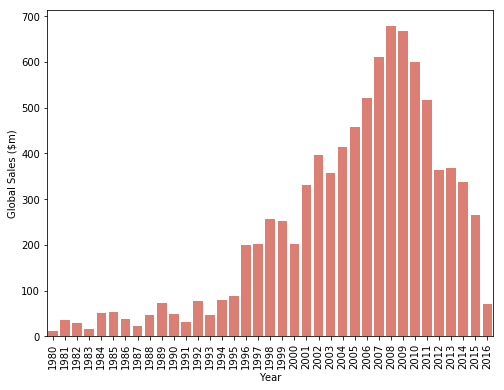

In [12]:
global_sales_by_year = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = global_sales_by_year.index, y = global_sales_by_year.values, color = '#EC7063')
plt.xticks(rotation = 90)
plt.ylabel('Global Sales ($m)')
plt.show()

### Based on Top 100
First, we explore the top ranked 100 games by publisher. Nintendo has the majority with 52 out of 100 games in the top 100! Even the next highest company, Activision only has 14 games in the top 100.

In [13]:
top_100 = df.head(100)
top_100.groupby('Publisher')['Name'].count()

Publisher
Activision                     14
Atari                           1
Bethesda Softworks              1
Electronic Arts                 5
Microsoft Game Studios          6
Nintendo                       52
Sega                            1
Sony Computer Entertainment     8
SquareSoft                      1
Take-Two Interactive            9
Ubisoft                         2
Name: Name, dtype: int64

Among the top 100 games, Nintendo already generates 920m!

In [14]:
top_100.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Activision,87.05,55.52,3.43,19.93,165.88
Atari,7.28,0.45,0.00,0.08,7.81
Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
Electronic Arts,10.54,22.95,0.47,5.90,39.85
Microsoft Game Studios,49.00,16.47,0.56,5.24,71.29
Nintendo,439.23,246.29,177.04,57.76,920.28
Sega,2.58,3.90,0.66,0.91,8.06
Sony Computer Entertainment,30.42,23.98,15.33,13.43,83.20
SquareSoft,2.28,1.72,3.63,0.23,7.86


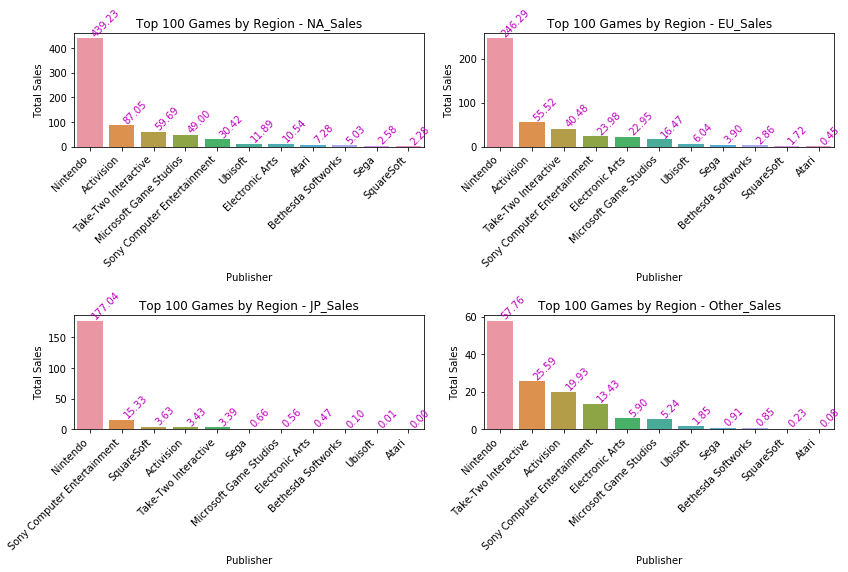

In [15]:
sns.set_palette('muted')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 8))

Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax = [ax0, ax1, ax2, ax3]

def plot_sales_publisher(Sales_sorted, ax):
    sns.barplot(x = Sales_sorted.index, y = Sales_sorted.values, ax = ax, ci = None)
    ax.set(ylabel = 'Total Sales', title = 'Top 100 Games by Region - ' + Sales)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    for i, v in enumerate(Sales_sorted.iteritems()):
        ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

for Sales, ax in zip(Sales, ax):
    Sales_sorted = top_100.groupby('Publisher')[Sales].sum().sort_values(ascending = False)
    plot_sales_publisher(Sales_sorted, ax)
    
plt.tight_layout()
plt.show()

Unsurprisingly, there are different characteristics even across the major regions. Nintendo is a Japanese company and it is no surprise they are the Japanese's favorite. The other regions such as US, Europe and others, are more diversified, as other companies do have substantial share, though Nintendo still dominates the top 100.

It would therefore seem that Nintendo is extremely successful in being the favorite among consumers. We will explore this claim more when we look at the dataset in full later.

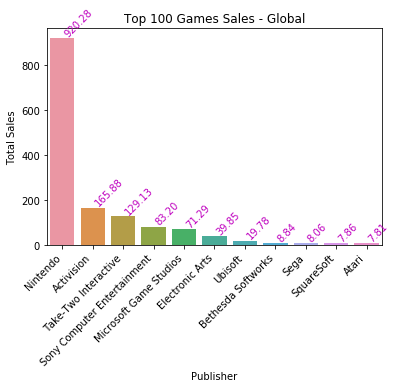

In [16]:
fig, ax = plt.subplots(1, 1)
Global_Sales = top_100.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False)
sns.barplot(x = Global_Sales.index, y = Global_Sales.values, ci = None)
ax.set(ylabel = 'Total Sales', title = 'Top 100 Games Sales - Global')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
for i, v in enumerate(Global_Sales.iteritems()):
    ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

### Genre based on Top 100 games
By looking at the genre split of the top 100 ranked games, Shooter and Platform were the top performers in the top 100.

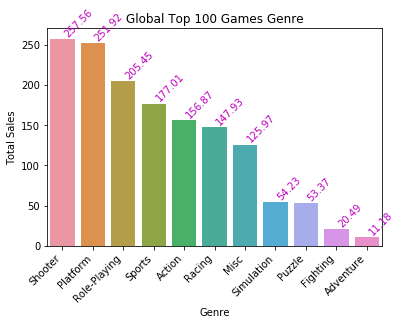

In [17]:
fig, ax = plt.subplots(1, 1)
Global_Sales = top_100.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)
sns.barplot(x = Global_Sales.index, y = Global_Sales.values, ci = None)
ax.set(ylabel = 'Total Sales', title = 'Global Top 100 Games Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
for i, v in enumerate(Global_Sales.iteritems()):
    ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

For NA and EU, Shooter, Platform, Sports, Role-Playing and Action are the top genres which gamers in the region like.

However, Japan does not follow this trend. Shooter genre is one of the least popular, and Role-Playing is the most popular genre. This actually corresponds to our real world observation that many games created by Japan are Role-Playing games

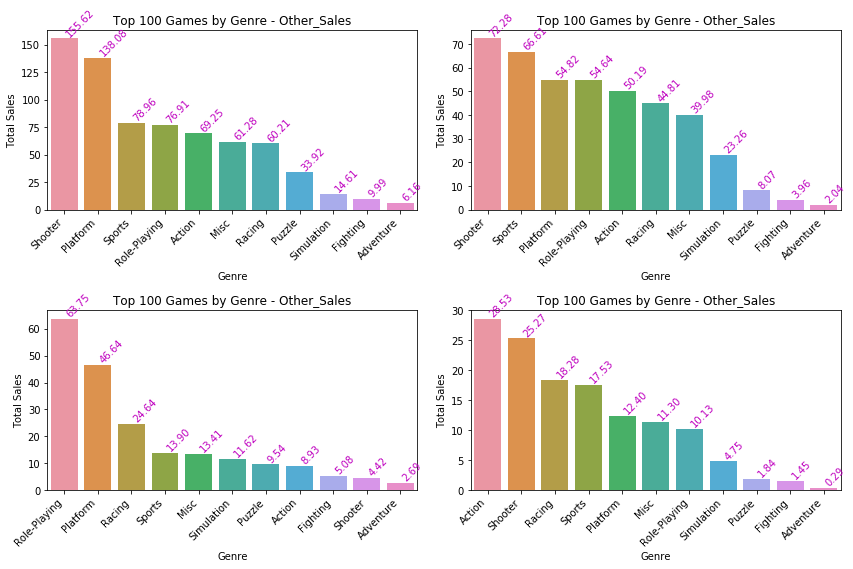

In [18]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 8))

region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax = [ax0, ax1, ax2, ax3]

def plot_sales_genre(Sales_sorted, ax):
    sns.barplot(x = Sales_sorted.index, y = Sales_sorted.values, ax = ax, ci = None)
    ax.set(ylabel = 'Total Sales', title = 'Top 100 Games by Genre - ' + Sales)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    for i, v in enumerate(Sales_sorted.iteritems()):
        ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

for region, ax in zip(region, ax):
    Sales_sorted = top_100.groupby('Genre')[region].sum().sort_values(ascending = False)
    plot_sales_genre(Sales_sorted, ax)
    
plt.tight_layout()
plt.show()

## Comparing the whole dataset
We now turn our attention back to the full dataset, instead of narrowing our analysis on the top 100 games. As there are 576 publishers in the dataset, to allow us to look at the top, I have set an arbitrary threshold of showing publishers with Global_Sales > 50m.

We note that Nintendo and EA have the most global sales, with 1.7b and 1.1b in Global Sales respectively. 

From the same table, we also observe that Nintendo has the highest sales in NA, Europe and Japan as well compared to all the other competitors

In [19]:
all_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
all_sales[all_sales['Global_Sales'] > 50].sort_values('Global_Sales', ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.54,163.03,7.33,50.14,473.25
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.15,24.30,270.66


Similar to above, an arbitrary threshold of 100 games were set so we can focus on the more established Publishers.

Unsurprisingly, EA produced the most games, which also partly explains it's second position in the global sales ranking (after all, more games released do generate more sales to some extent). On the other hand, the top performer, Nintendo, produced approximately half of EA at 696 games, signifying more sales were generated per game for Nintendo. 

Also unsurprising, is that the publishers with high global sales, also had released many games as well (Activision, Ubisoft, Sony etc.) as these companies appear in the top for both lists.

In [20]:
all_count = df.groupby('Publisher')[['Global_Sales']].count()
all_count[all_count['Global_Sales'] > 100].sort_values('Global_Sales', ascending = False)

,Global_Sales
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,917
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,630


Unlike the chart for the top 100, Nintendo isn't that much ahead compared to its competitors. In fact, other companies seem to be doing comparably well too.

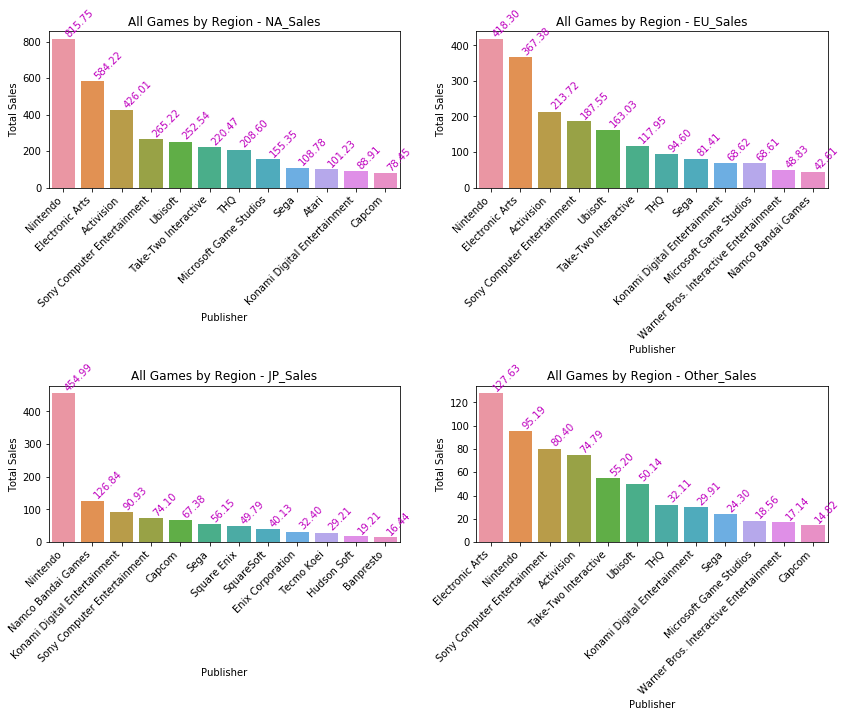

In [21]:
sns.set_palette('muted')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 10))

Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax = [ax0, ax1, ax2, ax3]

def plot_sales_publisher(Sales_sorted, ax):
    sns.barplot(x = Sales_sorted.index, y = Sales_sorted.values, ax = ax, ci = None)
    ax.set(ylabel = 'Total Sales', title = 'All Games by Region - ' + Sales)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    for i, v in enumerate(Sales_sorted.iteritems()):
        ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

for Sales, ax in zip(Sales, ax):
    Sales_sorted = df.groupby('Publisher')[Sales].sum().sort_values(ascending = False)[: 12] # Getting the top 12
    plot_sales_publisher(Sales_sorted, ax)
    
plt.tight_layout()
plt.show()

We now plot the total global sales by Genre, and we notice one key difference. Action was not the top genre in the top 100 games list. In totality, however, it seems that the market is more keen on the Action Genre, though not many made it into the top 100. Sports and Shooter still retain their position in the top spots.

Similarly, for Japan, Role Playing still dominates the market, and has at least twice the market share of the next most popular genre.

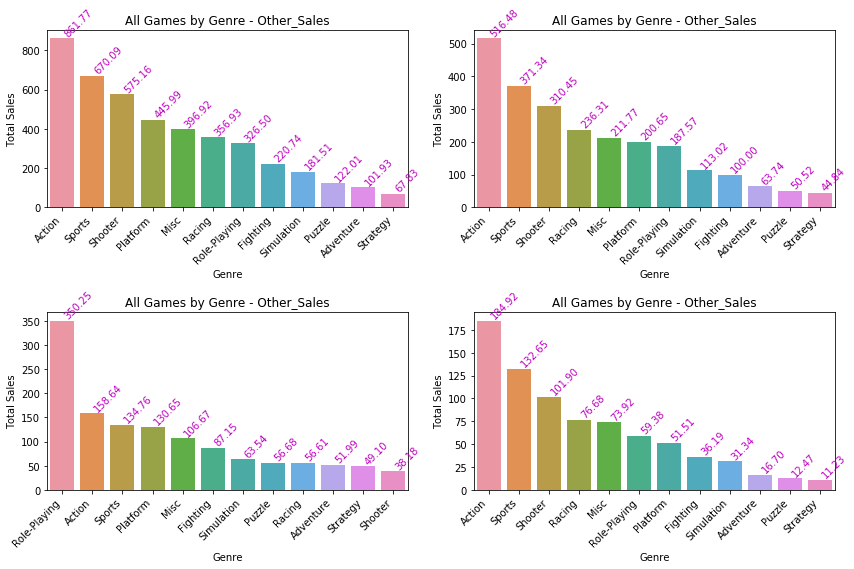

In [22]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 8))

region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax = [ax0, ax1, ax2, ax3]

def plot_sales_genre(Sales_sorted, ax):
    sns.barplot(x = Sales_sorted.index, y = Sales_sorted.values, ax = ax, ci = None)
    ax.set(ylabel = 'Total Sales', title = 'All Games by Genre - ' + Sales)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    for i, v in enumerate(Sales_sorted.iteritems()):
        ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

for region, ax in zip(region, ax):
    Sales_sorted = df.groupby('Genre')[region].sum().sort_values(ascending = False)
    plot_sales_genre(Sales_sorted, ax)
    
plt.tight_layout()
plt.show()

### Comparing by platforms

First, my plotting a scatterplot of the global sales by platform against time, we are able to visualize the rise and fall of the platforms, and their popularity when they were on the market.

In [23]:
by_platforms = df.groupby(['Year', 'Platform']).sum()
by_platforms = by_platforms.reset_index()
by_platforms.drop(['Rank'], axis = 1, inplace = True)

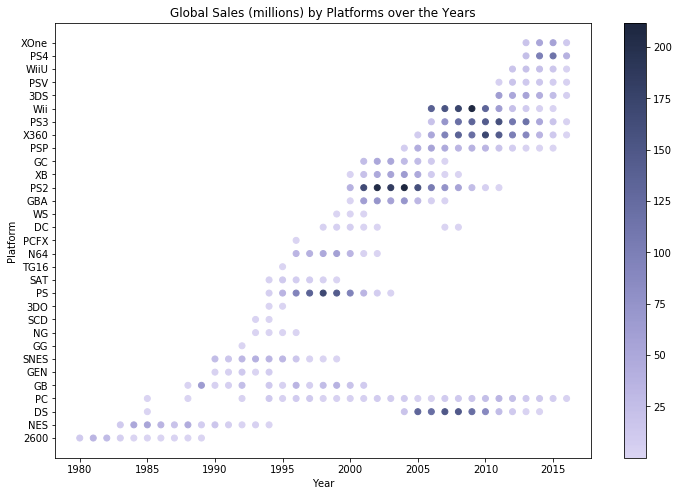

In [24]:
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap = True)

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
points = ax.scatter(x = 'Year', y = 'Platform', c = 'Global_Sales', cmap = cmap, data = by_platforms)
fig.colorbar(points)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.title('Global Sales (millions) by Platforms over the Years')
plt.show()

As expected, many of the platforms (except PC) have limited lifespan, with most phasing out within a decade or so. In particular, we notice that Wii (by Nintendo) was very successful in the initial 5 years, and slowly faded out. It's successor, WiiU, was not very popular.

The top platforms with highest sales can be observed to be Wii, PS3, X360, PS2, PS, DS (based on intensity of the color, with darker colors indicating higher sales). Sorting the Global Sales based on the platform confirms this.

In [25]:
by_platforms.groupby('Platform').sum().drop('Year', axis = 1).sort_values('Global_Sales', ascending = False).head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.26,194.05,175.02,60.27,818.62
PS,334.71,212.38,139.78,40.69,727.39
GBA,178.43,72.49,46.56,7.51,305.62
PSP,107.09,67.16,75.89,41.52,291.71
PS4,96.80,123.70,14.27,43.36,278.07


### Comparing by Publishers
Let us now do some analysis based on the Publishers.

In [26]:
by_publisher = df.groupby(['Publisher'])['Global_Sales'].sum()
top_5_publisher = by_publisher.sort_values(ascending = False)[:5]
top_5_publisher = top_5_publisher.index.tolist()

by_publisher_genre = df.groupby(['Publisher', 'Genre']).sum()
by_publisher_genre.drop(['Rank', 'Year'], axis = 1, inplace = True)
by_publisher_genre.reset_index(inplace = True)
by_publisher_genre = by_publisher_genre[by_publisher_genre['Publisher'].isin(top_5_publisher)]
by_publisher_genre.head(5)

,Publisher,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,Activision,Action,86.83,39.99,1.08,13.81,141.82
84,Activision,Adventure,4.04,0.87,0.10,0.41,5.42
85,Activision,Fighting,1.94,0.76,0.00,0.15,2.86
86,Activision,Misc,48.68,17.63,0.05,10.07,76.55
87,Activision,Platform,23.45,7.85,0.07,2.01,33.40


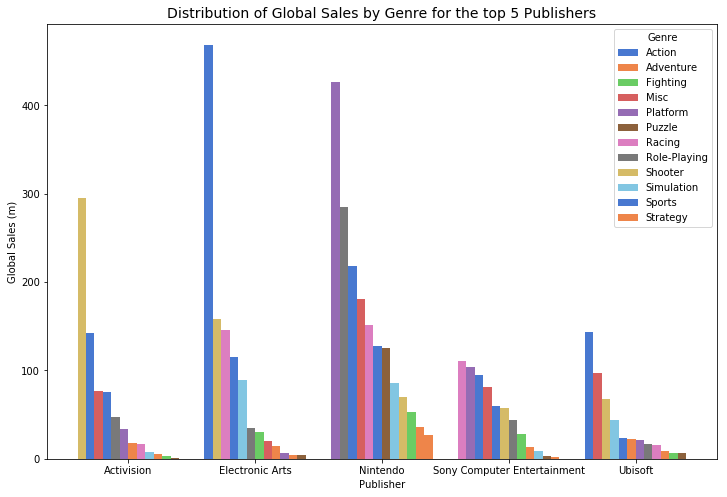

In [27]:
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    sns.set_palette('Set3', n_colors= 12)
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)

fig, ax = plt.subplots(figsize = (12, 8))    
sortedgroupedbar(ax, x="Publisher", y="Global_Sales", groupby="Genre", data=by_publisher_genre)
plt.title('Distribution of Global Sales by Genre for the top 5 Publishers', fontsize = 14)
plt.ylabel('Global Sales (m)')
plt.show()

This chart is useful as it allows us to see which companies are known for which Genre of games. As we can see, the specialty of companies vary quite significantly. While Activision and Ubisoft both specialize in Action, Misc, and Shooter, companies like EA have a strong focus on niche in Sports, Nintendo with Platform, Role-Playing and Sports, and Sony being more popular in Racing, Platform, and Action.

We also observe the relative importance each company places in their genre. For example, Activision, EA and Ubisoft seems to develop their niche genre of games more heavily, and place less emphasis on the remaining genres. Nintendo and Sony, on the other hand, seems to be more diversified, having garnered quite substantial sales even for genres which are not their top.

In [28]:
df.sort_values('Global_Sales', ascending = False).groupby('Genre').head(5).sort_values('Genre')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
400,401,Rugrats: Search For Reptar,PS,1998,Adventure,THQ,1.63,1.53,0.00,0.18,3.34
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
251,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
218,219,Assassin's Creed,PS3,2007,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83
158,159,Assassin's Creed,X360,2007,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55


Looking at the top 3 games per Genre, based on Global Sales, Nintendo dominates the list! Meanwhile, Action is dominated by Take-Two Interactive with their GTA franchise, while Activision dominates the Shooter genre with their Call of Duty franchise.

### Based on data from 2010 to 2016

To make our visualization more up-to-date with current years, we will look at the trends in the latest years of data available from 2010, and perform the same analysis as above.

In [29]:
after2010_df = df[df['Year'] >= 2010]
after2010_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76


Clearly, Nintendo has lost their huge lead, and other noteable companies like Activision, EA, Ubisoft have made substantial progress into the top ranked games.

In [30]:
after2010_top_100 = after2010_df.head(100)
after2010_top_100.groupby('Publisher')['Name'].count()

Publisher
505 Games                                  1
Activision                                17
Bethesda Softworks                         6
Capcom                                     1
Electronic Arts                           14
Microsoft Game Studios                     9
Nintendo                                  23
Sony Computer Entertainment                7
Sony Computer Entertainment Europe         2
Take-Two Interactive                       6
Ubisoft                                   12
Warner Bros. Interactive Entertainment     2
Name: Name, dtype: int64

Again, analzying the Publisher's market share by regions, we note that Activision is now the largest market share in North America, Europe and Other regions. We also note that the market share profile for these 3 regions are pretty similar, with the top Publishers being pretty identical (though North America differs slightly based on the rankings)

Meanwhile, Nintendo continues to dominate sales in Japan, with sales at 47.32m which is nearly 10 times as the next competitor Capcom! We also note that all time favorites for other companies, like Activision, EA etc. are not popular in Japan.

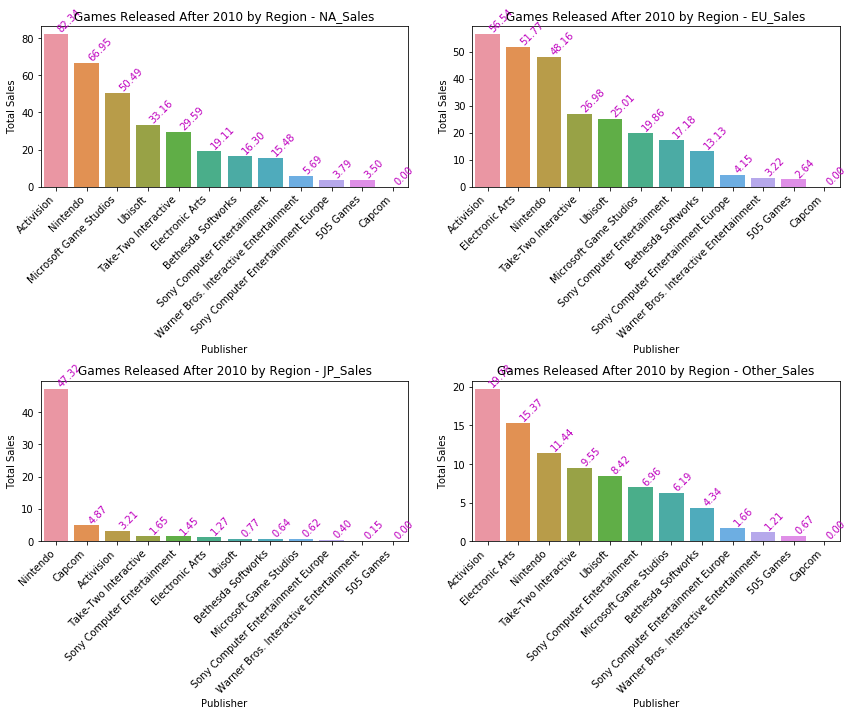

In [31]:
sns.set_palette('muted')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 10))

Sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax = [ax0, ax1, ax2, ax3]

def plot_sales_publisher(Sales_sorted, ax):
    sns.barplot(x = Sales_sorted.index, y = Sales_sorted.values, ax = ax, ci = None)
    ax.set(ylabel = 'Total Sales', title = 'Games Released After 2010 by Region - ' + Sales)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    for i, v in enumerate(Sales_sorted.iteritems()):
        ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

for Sales, ax in zip(Sales, ax):
    Sales_sorted = after2010_top_100.groupby('Publisher')[Sales].sum().sort_values(ascending = False)
    plot_sales_publisher(Sales_sorted, ax)
    
plt.tight_layout()
plt.show()

There isn't much changes in terms of the genre distribution after 2010, compared to the full dataset.

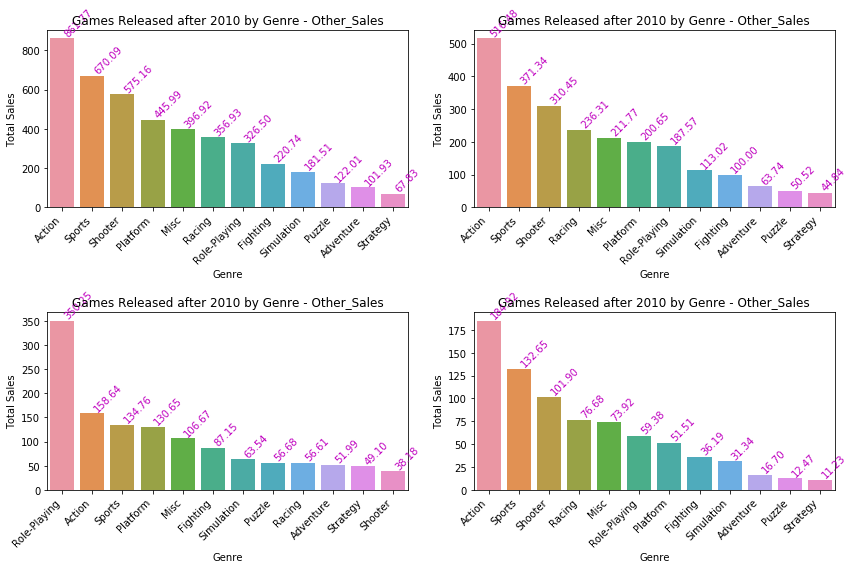

In [32]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize = (12, 8))

region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
ax = [ax0, ax1, ax2, ax3]

def plot_sales_genre(Sales_sorted, ax):
    sns.barplot(x = Sales_sorted.index, y = Sales_sorted.values, ax = ax, ci = None)
    ax.set(ylabel = 'Total Sales', title = 'Games Released after 2010 by Genre - ' + Sales)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    for i, v in enumerate(Sales_sorted.iteritems()):
        ax.text(i ,v[1], "{:.2f}".format(v[1]), color='m', va ='bottom', rotation=45)

for region, ax in zip(region, ax):
    Sales_sorted = df.groupby('Genre')[region].sum().sort_values(ascending = False)
    plot_sales_genre(Sales_sorted, ax)
    
plt.tight_layout()
plt.show()

In [33]:
after2010_by_publisher = after2010_df.groupby(['Publisher'])['Global_Sales'].sum()
after2010_top_5_publisher = after2010_by_publisher.sort_values(ascending = False)[:5]
after2010_top_5_publisher = after2010_top_5_publisher.index.tolist()

after2010_by_publisher_genre = after2010_df.groupby(['Publisher', 'Genre']).sum()
after2010_by_publisher_genre.drop(['Rank', 'Year'], axis = 1, inplace = True)
after2010_by_publisher_genre.reset_index(inplace = True)
after2010_by_publisher_genre = after2010_by_publisher_genre[after2010_by_publisher_genre['Publisher'].isin(after2010_top_5_publisher)]
after2010_by_publisher_genre.head(5)

,Publisher,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
32,Activision,Action,22.77,14.06,0.28,4.56,41.71
33,Activision,Adventure,0.64,0.39,0.00,0.15,1.17
34,Activision,Misc,7.83,3.91,0.00,1.33,13.06
35,Activision,Platform,4.40,2.30,0.00,0.78,7.43
36,Activision,Puzzle,0.06,0.00,0.00,0.01,0.07


There is not much changes in terms of the genres that the Publishers specialize in. However, Activision seem to have focused more on their Shooter Genre as compared to our previously analysis.

Finally, one clear distinction is that the bars for Activision and EA are much greater than Nintendo, unlike when we compared the whole dataset. This is consistent with what we have observed previously.

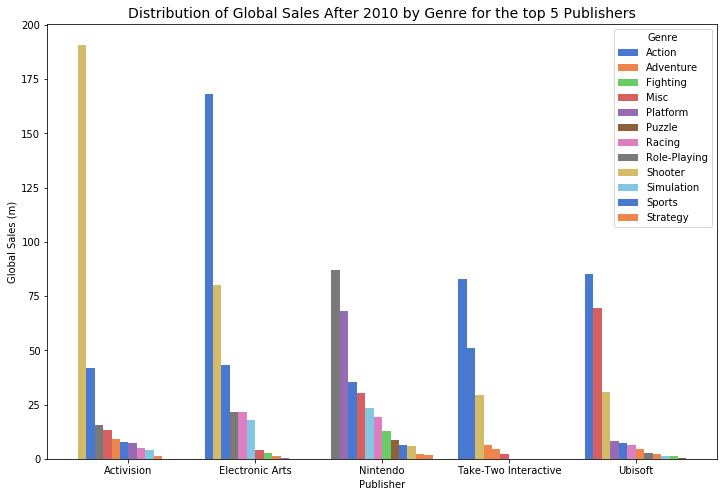

In [34]:
fig, ax = plt.subplots(figsize = (12, 8))    
sortedgroupedbar(ax, x="Publisher", y="Global_Sales", groupby="Genre", data=after2010_by_publisher_genre)
plt.title('Distribution of Global Sales After 2010 by Genre for the top 5 Publishers', fontsize = 14)
plt.ylabel('Global Sales (m)')
plt.show()

Finally, the list of the top Publisher and Games for each Genre by and large remains the same players. However, we note that the Sports domain is now dominated by EA, with their FIFA franchise generating the largest sales for the genre.

In [35]:
after2010_df.sort_values('Global_Sales', ascending = False).groupby('Genre').head(5).sort_values('Genre')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
115,116,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.83
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
82,83,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
1122,1124,Until Dawn,PS4,2015,Adventure,Sony Computer Entertainment Europe,0.44,0.89,0.05,0.25,1.64
969,971,Beyond: Two Souls,PS3,2013,Adventure,Sony Computer Entertainment,0.52,0.88,0.06,0.34,1.79
549,550,L.A. Noire,X360,2011,Adventure,Take-Two Interactive,1.52,0.94,0.02,0.24,2.72
447,448,Heavy Rain,PS3,2010,Adventure,Sony Computer Entertainment,1.29,1.27,0.06,0.50,3.12
417,418,L.A. Noire,PS3,2011,Adventure,Take-Two Interactive,1.27,1.33,0.12,0.51,3.23


# Conclusion
This is my simple EDA on this dataset. Through this dataset, we are able to analyse the distribution of sales by Publisher and by Genre, and determine which were the big players from 1980 through to 2016, and from 2010 to 2016. It also let us have a glimpse on which Publishers were more popular in which Genre, which can provide for some insights if we were to perform an competitor analysis for the gaming industry. We can compare the top players for a particular Genre to determine the Publisher's direct competition. As an example, Nintendo may not be a direct competitor with Activision, since the type of games they create likely attracts different market segments. We would thus be more interested in companies that release Shooter game to make our analysis more relevant. 

All in all, I believe there may be some other improvements which can be done to make this analysis more meaningful, and I would greatly appreciate any feedback, whether for the coding or for the analysis! :)